In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Let's say we have the code below and we want to know what N is

In [2]:
# N is supposed to be the number of Z's in all of Shakespeare's plays. But let's assume that we don't
# this 1020.
N = 1020 
sample_size = 30
population = Table().with_column('Serial number', np.arange(N)+1)
observation = population.sample(sample_size).column(0)

We know the following information:

In [3]:
observation

array([303, 173,  52, 195,   5, 358, 990, 520, 956, 374, 498, 133, 669,
       788, 737, 481,  20, 415, 928, 522, 196, 981, 642, 106,  13,  24,
       565, 860,  98, 341])

In [4]:
observation.max()

990

In [5]:
np.average(observation)

431.43333333333334

We know 2 approaches:  **Maxes** and **Twice the average**

In [6]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
1004,1026.8
964,869.333
1002,1079.2
1003,1061.87
981,995.2
1000,1023.93
1005,884.733
982,926.667
1006,972.2
970,872.933


If we make a histogram comparing **Max** and **2 x Average**, it would look like the following,

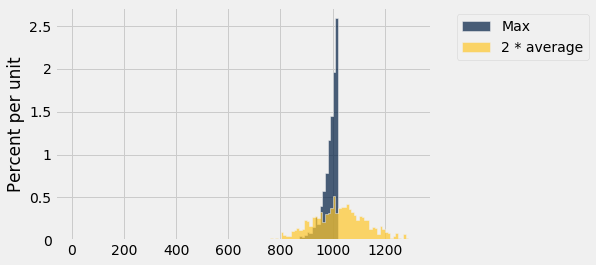

In [7]:
every_ten = np.arange(1, N+300, 10)
estimates.hist(bins=every_ten)

From above, we notice that:
* The **Max** estimator gives around 1,000
* The **2 x average** estimator is more spread out

# Bias & Variance

## Bias
* **Biased estimate**: On average across all possible samples, the estimate is either too high or too low
* Bias creates a systematic error in one direction
* Good estimates typically have low bias

## Variability
* The degree to which the value of an estimate **varies** from one sample to another
    * How spread out the estimate is
* High variability makes it hard to estimate accurately
* Good estimates typically have low variability
<img src = 'bias.jpg' width = 600\>

## Bias-variance trade-off
* The **max** has low variability, but it is biased
* **2 x average** has little bias, but highly variable

**Is there an estimator that's both low in bias and variability?**

### Twice the Median Estimator

One new idea: **Twice the Median**.

In [8]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)
double_median = make_array() # 2 * np.median(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    double_median = np.append(double_median, 2 * np.median(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    '2 * median', double_median,
)

estimates

Max,2 * average,2 * median
1006,983.667,949
969,1005.33,759
967,963,983
977,1040.07,1102
1016,1096.8,1016
1015,987.2,955
1002,1112.47,1210
982,870.4,850
1000,1145.67,1208
836,724.4,578


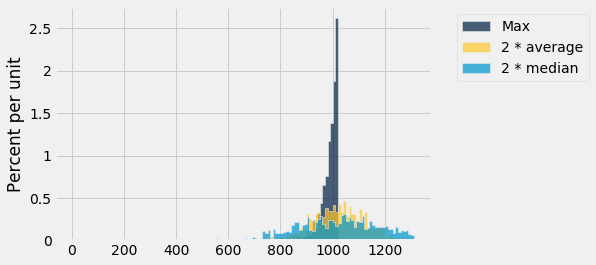

In [9]:
estimates.hist(bins=every_ten)

Turns out the **twice the median** estimator is more spread out than the **twice the average** estimator! 

### Max + Min Estimator
Another idea is to add up the **Max** and **Min**

In [10]:
maxes = make_array()    # max(observations)
doubles = make_array()  # 2 * np.average(observations)
max_plus_min = make_array() # clever(observation)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    max_plus_min = np.append(max_plus_min,
                             np.max(observation) + np.min(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    'Max + min', max_plus_min,
)

estimates

Max,2 * average,Max + min
1013,962.933,1096
1010,1035.6,1021
965,955.4,1001
978,924.8,984
987,960.733,996
990,1317.47,1102
959,1163.13,972
984,1231.73,1054
895,792.333,933
1006,1077.93,1028


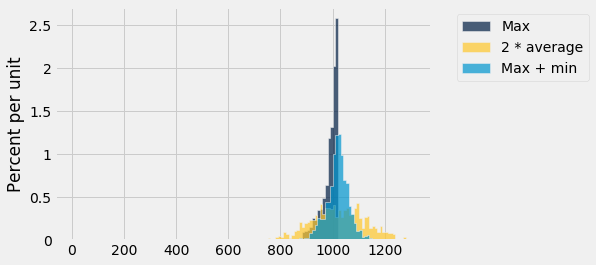

In [11]:
estimates.hist(bins=every_ten)

We can calculate the variability of each estimator above by:
1. Calculate the difference between each value and the average of the values
2. Take the average of those differences.

In [12]:
# Varability of the 'Max' Estimator
np.abs(estimates.column(0) -
       estimates.column(0).mean()).mean()

24.857743999999997

In [13]:
# Variability of the 'Twice the average' estimator
np.abs(estimates.column(1) -
       estimates.column(1).mean()).mean()

86.11313173333333

In [14]:
# Variability of the 'Max + Min' estimator
np.abs(estimates.column(2) -
       estimates.column(2).mean()).mean()

33.31172

# Testing Hypotheses
Data scientists are often faced with yes/no questions about the world. For example:
* is chocolate good for you?
* Did water from the Broad Street pump cause cholera?
* Have the demographics in California changed over the past decade?

Whether we can answer theses questions or not depends on the data we have. 
* Census data about California can settle questions about demographics with least uncertainty about the answer.
* We know that Broad Street pump water was contaminated by waste from cholera victims, so we can make a good guess of whether it caused cholera.

Whether chocolate or any other treatment is good for you is the kind of question that have to be answered by medical experts. However, the initial step consists of using data science to analyze data from studies and randomized experiments.

In this chapter, we'll try to answer such questions, basing our conclusions from random samples and empirical distributions.

# Assessing Models
In data science, a **model** is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data.

Sometimes, data scientists have to decide whether or not their models are good. In this section we will discuss 2 examples of making such decisions. In later sections we will use the methods developed here as the building blocks of a general framework for testing hypotheses.

## Comparing Samples to Distributions
Previously, we've been working on figuring out whether we can take a sample and use it to estimate some number about the population. In the planes problem, we take sample of planes and try to estimate how many total planes there are. Another way we can use a sample is by taking a sample, make a guess of the population, and see whether the sample looked like it came from the population.

## Jury Panels
How jury panels are selected:
1. There are **eligible jurors** in a county, which is everyone in a country that is over 18 years old and registered to vote
2. From the **eligible jurors**, we filter them so only the **eligible residents** are selected
3. From **eligible residents**, filter them so only **jury panels** are selected
4. and finally, filter again to finally have the **jury**, a.k.a. the final people that can make decision

**We want to know whether the jury selection is fair**

**Section 197 of California's Code of Civil Procedure**: All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court.

**Sixth Amendment to the US Constitution**: ...the accused shall enjoy the right to a speedy and public trial, by an impartial jury of the state and district wherein the crime shall have been committed.

## U.S. Supreme Court, 1965: Swain vs. Alabama
In the early 1960’s, in Talladega County in Alabama, a black man called Robert Swain was convicted of raping a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain’s trial. No black man was selected for the trial jury.

In 1965, the Supreme Court of the United States denied Swain’s appeal. In its ruling, the Court wrote **“… the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes.”**

Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low.

One model (or assumption) of the data is that the panel was selected at random and ended up with a small number of black men, which agrees with the Supreme Court ruling. The model specifies that the data are a random sample from a population in which 26% of it are black. This is a good opportunity to assess the model because:
* We can simulate data based on the model
    * We can simulate drawing at random from a population of whom 26% are black.
* Our simulation will show what the panel **should look like** if it is selected at random
* We can then compare the results of the simulation with the composition of Robert Swain's panel
* If the results of our simulation are not consistent with the composition of Swain's panel, that will become an evidence against the model

### The Statistic
First, we need to choose a **statistic** to simulate. The statistic has to be able to help us decide between the model and alternative views about the data.
* Model: Panel was drawn at random
* Alternative viewpoint suggested by Robert Swain's appeal: the panel was not drawn at random because the black men is too few

A natural statistic would be the number of black in our simulated sample of 100 people representing the panel. Small values of the statistic will favor the alternative viewpoint.

### Predicting the Statistic Under the Model
If the model were true, how big would the statistic typically be? To answer that, we have to start by working out the details of the simulation.

#### Generating one value of the statistic
First we figure out how to simulate one value of the statistic. For this, we have to **sample 100 times at random from the population of eligible jurors and count the number of black men we get**.

One way is to set up a table representing the **eligible population** and use `sample` as we've done in previous chapter. However, there's a quicker way: 
use `datascience` function tailored for sampling at random from categorical distributions. 

The `sample_proportions` function in the `datascience` library takes 2 arguments:
* Sample size
* The distribution of the categories in the population, as a list or array of proportions that add up to 1

`sample_proportions` returns an array containing the distribution of the categories in a random sample of the given size. This is an array consisting of the sample proportions in all the different categories.

According to our model, the panel is selected at random from a population where 26% were black. The **distribution of the 2 categories** can be represented as the list `[0.26, 0.74]`, which we have assigned to the name `eligible_population`. 

Now let's sample at random 100 times from this distribution and see what proportions of the 2 categories we get in our sample.

In [15]:
# Every time you run it, the output array is different!

eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)

array([0.25, 0.75])

The proportion of black in the random sample is `item(0)` of the output array above!

Since there are 100 people in the sample, the number of people in each category is 100 times the proportion. We can simulate counts instead of proportions and access the count of black only.

In [16]:
# count of black people in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)

31.0

### Running the Simulation
To get a sense of the variability without having to run the cell multiple times, let's generate 10,000 simulated values of the count. 

In [17]:
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    simulated_count = (100 * sample_proportions(100, eligible_population)).item(0)
    counts = np.append(counts, simulated_count)

### The Prediction
To interpret the results of our simulation, we start as usual by visualizing the results by an empirical histogram.

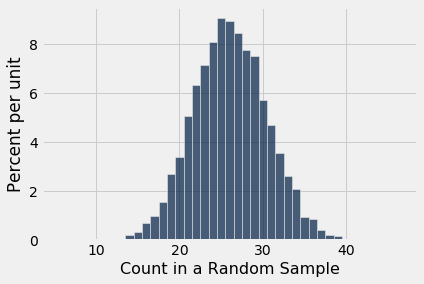

In [18]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

The histogram above tells us what the model of random selection predicts about our statistic, the count of the black people in the sample.

To generate each simulated count, we drew at 100 times at random from a population in which 26% were black. Thus, most of the simulated counts are around 26. They are not exactly 26 - there is some variation. The counts range between 10 and 45.

### Comparing the Prediction and the Data
Though the simulated counts are quite varied, very few of them came out to be 8 or less. The value of 8 is far out in the left side of the histogram.  

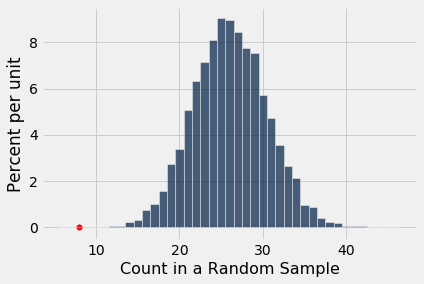

In [19]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, 0, color='red', s=30);

The simulation shows that if we select a panel of 100 jurors at random from the eligible population, it is very unlikely to get as low black people as 8 that were in Swain's jury panel. This is an evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel.

When the data and a model are inconsistent, the model is hard to justify. 
* The data are real
* Model is just a set of assumptions

When assumptions are at odds with reality, the assumptions are questionable.

While it is possible that the panel could have been generated by chance, our simulation shows that it is very unlikely. Our assessment is that the model of random draws is not supported by the evidence. 

## Is the Actual Jury Panel Likely? (Video Lecture)
Below we have a table `swain` that contains the ethnicities of people in Alabama county.

In [20]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


###  The Big Question: What's the probability of getting 8/100 blacks in a panel?
1. Start with distributions of eligible panel and the actual panel
2. Draw panels at random from my population
3. Estimate the probability. See if actual panel is likely.

### Step 1: Distribution of eligible panel and actual panel

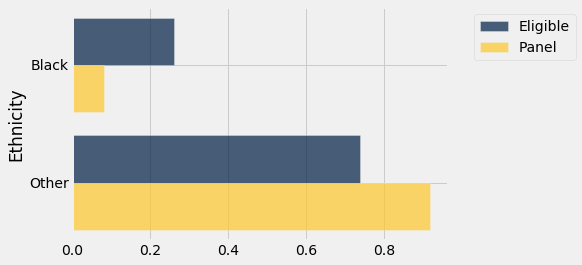

In [21]:
swain.barh(0)

Above we can see the distribution comparison between the eligible panel and the actual panel.

Recall the warplanes problem. If we want to find the difference between the estimate value and the actual value, we can just calculate the difference. For example:
* We took a sample of 20 warplanes and found that the `max` is 290
* The actual N is 300
* Thus, the difference is 10. So we're 10 off.

Distributions are more tricky. We can't just subtract 26 with 8 or 74 with 92. Thus, we use **TVD (total variation distance)**.

## Total Variation Distance

In [22]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [23]:
tvd = sum(abs(swain.column(1) - swain.column(2)))/2
tvd

0.18000000000000002

How we take **total variation distance** above:
1. Find the absolute difference between each column
2. Sum them
3. Divide by the number of rows involved

The closer the distributions are to each other, the lower the TVD. 
* High TVD = bigger difference
* Low TVD = less difference

For convenience, let's make a TVD function.

In [24]:
def TVD(dist1, dist2):
    return sum(abs(dist1-dist2)) / 2

TVD(swain.column(1), swain.column(2))

0.18000000000000002

### Step 2: Sample panels from population

In [25]:
swain.sample(10)

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%
Other,74%,92%
Black,26%,8%
Black,26%,8%
Other,74%,92%
Black,26%,8%
Black,26%,8%
Other,74%,92%
Black,26%,8%


Above, we took a sample of 10, but this is not what we want! Here we just picked rows out of our original table!

What we want is, pick 100 people from the population and look at the proportions of black vs non-black.

In [26]:
ethnicities = swain.select(0)
ethnicities

Ethnicity
Black
Other


In [27]:
ethnicities.sample(10)

Ethnicity
Black
Black
Other
Black
Other
Other
Other
Black
Other
Black


Above, we take a sample of 10 people from the "supposedly population". However, this is still not right, because in the sample, we have equal chance of picking black and non-black. Recall the population has 26% black, so in the sample we should see less black.

In [28]:
pop_distribution = swain.column('Eligible')
pop_distribution

array([0.26, 0.74])

We can use the number above to take sample at specific proportions!

In [29]:
ethnicities.sample(10, weights = pop_distribution)

Ethnicity
Other
Black
Other
Other
Other
Other
Other
Other
Other
Black


Now we'll take 100 sample and group them by ethnicity.

In [30]:
samplePanel = ethnicities.sample(100, weights= pop_distribution).group('Ethnicity')
samplePanel

Ethnicity,count
Black,19
Other,81


In [31]:
counts = samplePanel.column('count')
counts

array([19, 81])

In [32]:
proportions = counts / 100
proportions

array([0.19, 0.81])

In [33]:
# 'with_random' will be the swain table with the additional 'Random'
with_random = swain.with_column('Random', proportions)
with_random.set_format([1, 2, 3], PercentFormatter(0))

Ethnicity,Eligible,Panel,Random
Black,26%,8%,19%
Other,74%,92%,81%


Now we're going to draw multiple panels and see if the 8% panel is likely to appear by random chance. This means we have to run the following function multiple times:

In [34]:
def random_jury_panel():
    samplePanel = ethnicities.sample(100, weights= pop_distribution).group('Ethnicity')
    with_random = swain.with_column('Random', proportions)
    with_random.set_format([1, 2, 3], PercentFormatter(0))
    return with_random

random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,26%,8%,19%
Other,74%,92%,81%
